### Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import datetime

from sklearn.metrics import precision_score, make_scorer

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

import math
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv('/content/open_1h.csv')

In [5]:
df.set_index('startTime',inplace=True)
df.head()

,open
startTime,
2024-07-25 19:00:00,5646332
2024-07-25 20:00:00,5657077
2024-07-25 21:00:00,5709340
2024-07-25 22:00:00,5756905
2024-07-25 23:00:00,5740132


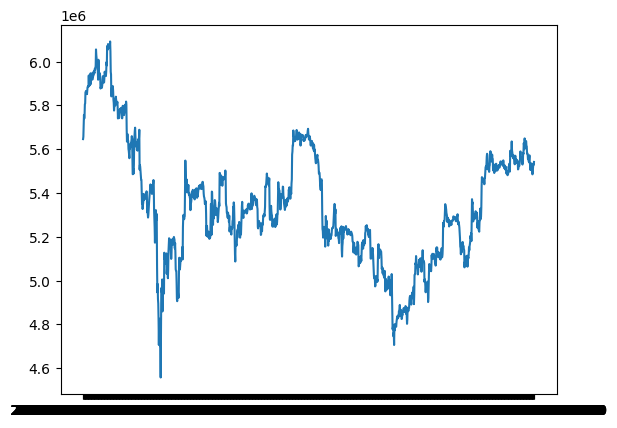

In [60]:
plt.plot(df)

In [9]:

  q1=df['open'].quantile(0.25)
  q3=df['open'].quantile(0.75)
  iqr=q3-q1
  df[(df['open']>q3+1.5*(iqr))]=df['open'].quantile(0.95)
  df[(df['open']<q1-1.5*(iqr))]=df['open'].quantile(0.05)

<ipython-input-9-adf5b650fa41>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5885095.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[(df['open']>q3+1.5*(iqr))]=df['open'].quantile(0.95)


In [11]:
scaler=StandardScaler()
df1=scaler.fit_transform(df)

In [12]:
type(df1)

numpy.ndarray

In [13]:
df1[:10]

array([[1.10464883],
       [1.14426824],
       [1.33697459],
       [1.51235827],
       [1.45051215],
       [1.50148828],
       [1.69022715],
       [1.7064547 ],
       [1.89348638],
       [1.90255331]])

In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(975, 525)

In [16]:
def create_dataset(dataset, time_step=100):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
X_train.shape,y_train.shape

((874, 100), (874,))

In [19]:
X_test.shape,ytest.shape

((424, 100), (424,))

In [20]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - loss: 0.3389 - val_loss: 0.0954
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 0.1320 - val_loss: 0.0603
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - loss: 0.1058 - val_loss: 0.0425
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step - loss: 0.0853 - val_loss: 0.0417
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - loss: 0.0621 - val_loss: 0.0428
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 0.0645 - val_loss: 0.0361
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 241ms/step - loss: 0.0618 - val_loss: 0.0308
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 0.0603 - val_loss: 0.0313
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - loss: 0.0560 - val_loss: 0.0282
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - loss: 0.0544 - val_loss: 0.0231
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - loss: 0.0500 - val_loss: 0.0294
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5

In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
math.sqrt(mean_squared_error(y_train,train_predict))

5354870.401348049

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

5316247.713930786

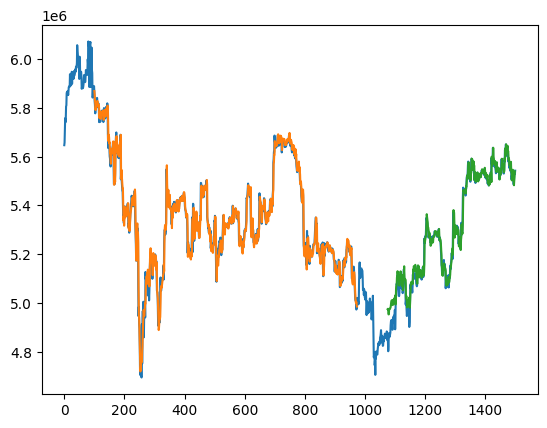

In [27]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [80]:
len(test_data)

525

In [28]:
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [30]:
temp_input[1:10]

[0.6658374978163542,
 0.6547573347804855,
 0.6060820495104347,
 0.5898655579857257,
 0.6111225097001294,
 0.6369627035621486,
 0.5322450229569337,
 0.5213897816998296,
 0.5555631431029682]

In [31]:


lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.7290871]
101
1 day input [0.6658375  0.65475733 0.60608205 0.58986556 0.61112251 0.6369627
 0.53224502 0.52138978 0.55556314 0.55937575 0.49677744 0.5213271
 0.51351014 0.55889272 0.64438881 0.6155767  0.6790157  0.69581109
 0.55821427 0.90763578 0.82149074 0.81267455 0.89022831 0.92840602
 1.06529489 0.91984793 0.87036145 0.83851474 0.80178981 0.78237648
 0.83227961 0.78441183 0.76428687 0.72417336 0.68088882 0.75253194
 0.82439998 0.69897843 0.72933918 0.76567696 0.72426923 0.72788641
 0.74678353 0.69968638 0.73127867 0.59393627 0.60285203 0.6658375
 0.66351085 0.64829729 0.69342176 0.72420286 0.8075714  0.89694647
 0.79200387 0.7957501  0.78043699 0.76877793 0.79529657 0.68582973
 0.6759811  0.70689125 0.87430311 0.85490085 1.03544666 1.00632482
 0.93355341 1.11645538 1.01385786 0.96675334 1.05057542 1.05935106
 1.07122398 0.98024127 0.97775607 0.8608668  0.86668158 0.85252626
 0.76840183 0.76110846 0.80859646 0.72267265 0.77311781 0.83208788
 0.69778376 0.67932912 0.58518645 0.6

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [86]:
len(df1)

1500

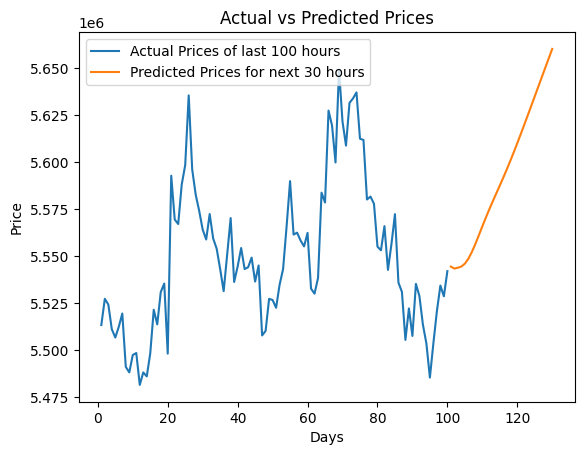

In [33]:
plt.plot(day_new,scaler.inverse_transform(df1[-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Actual vs Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(['Actual Prices of last 100 hours', 'Predicted Prices for next 30 hours'])
plt.show()